In [12]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import librosa
from scipy.stats import pearsonr

In [13]:
def filter_audio(ipath,opath):
    sample_rate, audio_data = wavfile.read(ipath)
    cutoff_frequency = 1000  
    filter_order = 6         
    filter_type = 'high'  
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(filter_order, normal_cutoff, btype=filter_type, analog=False)
    filtered_audio_data = lfilter(b, a, audio_data)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.title('Original Audio Signal')
    plt.plot(audio_data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.subplot(2, 1, 2)
    plt.title('Filtered Audio Signal')
    plt.plot(filtered_audio_data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    wavfile.write(opath, sample_rate, np.int16(filtered_audio_data))

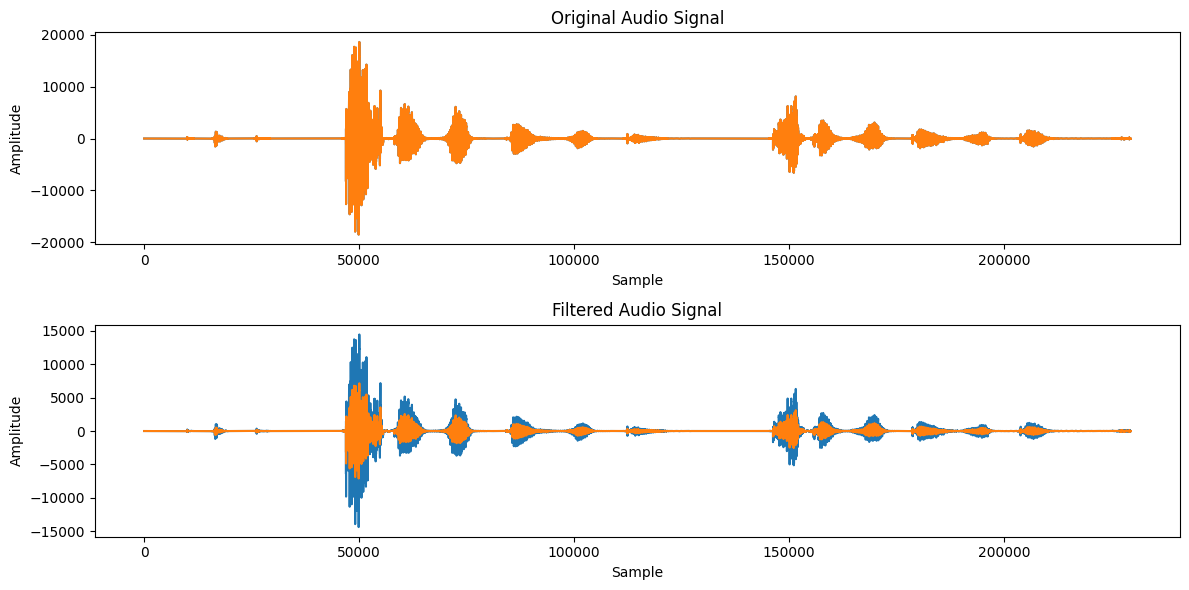

In [14]:
filter_audio('test.wav','test_filtered.wav')

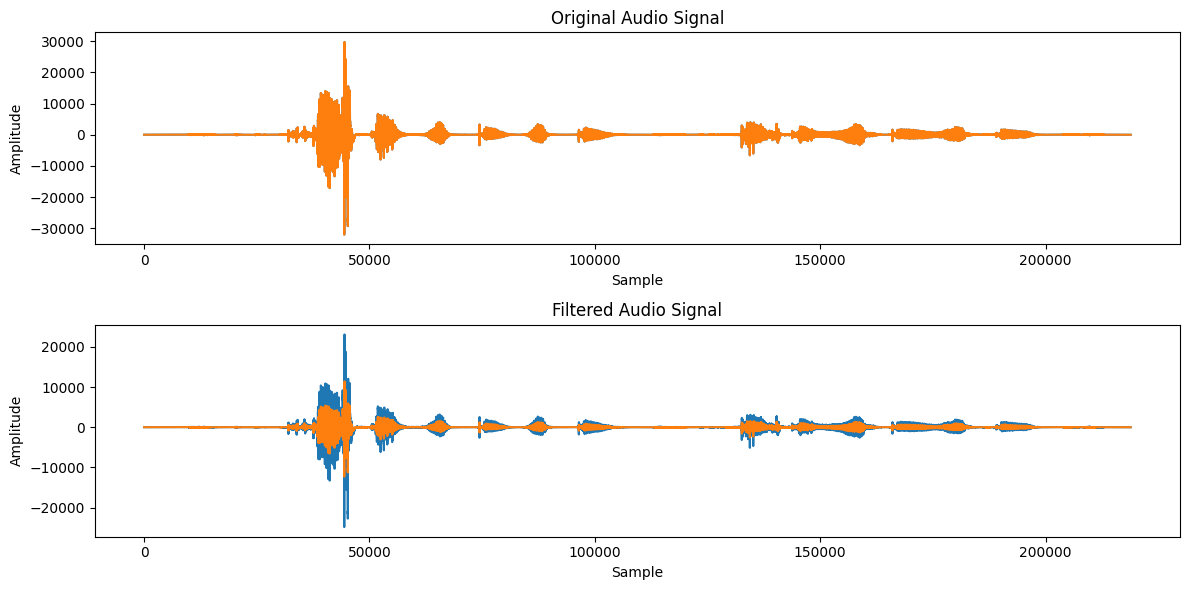

In [15]:
filter_audio('match test.wav','match test_filtered.wav')

## Loading the Audio Files

In [16]:
audio_data_original,sample_rate_original = librosa.load('test.wav')

In [17]:
audio_data_matching,sample_rate_matching = librosa.load('match test.wav')

## Calculating FFT of the Audio Files

In [18]:
X = np.fft.fft(audio_data_original)
Y = np.fft.fft(audio_data_matching)

## Finding Pearson Correlation Coefficient

In [19]:
min_len = min(len(X),len(Y))
X = X[0:min_len]
Y = Y[0:min_len]

In [20]:
X_mod = np.abs(X)**2
Y_mod = np.abs(Y)**2

In [21]:
r = pearsonr(X_mod,Y_mod)

In [22]:
print("Correlation Coefficient: ",r)

Correlation Coefficient:  PearsonRResult(statistic=0.3094560403431607, pvalue=0.0)
